In [198]:
import pandas as pd
from datetime import datetime
from statistics import mean 
from scipy import stats
%matplotlib inline
from matplotlib import pyplot as plt

In [147]:
df = pd.read_csv('../Resources/hawaii_measurements.csv')
df.head()

,station,date,prcp,tobs
0,USC00519397,2010-01-01,0.08,65
1,USC00519397,2010-01-02,0.00,63
2,USC00519397,2010-01-03,0.00,74
3,USC00519397,2010-01-04,0.00,76
4,USC00519397,2010-01-06,NaN,73


In [148]:
#checking data types
df.dtypes

station     object
date        object
prcp       float64
tobs         int64
dtype: object

In [149]:
df['date'] = pd.to_datetime(df['date'])
df['new_date'] = df['date'].dt.date

In [150]:
df.dtypes

station             object
date        datetime64[ns]
prcp               float64
tobs                 int64
new_date            object
dtype: object

In [151]:
df

,station,date,prcp,tobs,new_date
0,USC00519397,2010-01-01,0.08,65,2010-01-01
1,USC00519397,2010-01-02,0.00,63,2010-01-02
2,USC00519397,2010-01-03,0.00,74,2010-01-03
3,USC00519397,2010-01-04,0.00,76,2010-01-04
4,USC00519397,2010-01-06,NaN,73,2010-01-06
...,...,...,...,...,...
19545,USC00516128,2017-08-19,0.09,71,2017-08-19
19546,USC00516128,2017-08-20,NaN,78,2017-08-20
19547,USC00516128,2017-08-21,0.56,76,2017-08-21
19548,USC00516128,2017-08-22,0.50,76,2017-08-22


In [152]:
df = df.set_index('new_date')
df

,station,date,prcp,tobs
new_date,,,,
2010-01-01,USC00519397,2010-01-01,0.08,65
2010-01-02,USC00519397,2010-01-02,0.00,63
2010-01-03,USC00519397,2010-01-03,0.00,74
2010-01-04,USC00519397,2010-01-04,0.00,76
2010-01-06,USC00519397,2010-01-06,NaN,73
...,...,...,...,...
2017-08-19,USC00516128,2017-08-19,0.09,71
2017-08-20,USC00516128,2017-08-20,NaN,78
2017-08-21,USC00516128,2017-08-21,0.56,76


In [153]:
df.index[300]

datetime.date(2010, 11, 25)

In [154]:
#drop date
df = df.drop(columns='date')

In [168]:
df.dtypes

station     object
prcp       float64
tobs         int64
dtype: object

In [176]:
df

,station,prcp,tobs
new_date,,,
2010-01-03,USC00519397,0.00,74
2010-01-04,USC00519397,0.00,76
2010-01-06,USC00519397,NaN,73
2010-01-07,USC00519397,0.06,70
2010-01-08,USC00519397,0.00,64
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76


In [159]:
#testing dates
if df.index[300].month == 11:
    print("yes, 11")
if df.index[1].month != 2:
    print('no')

yes, 11
no


In [177]:
#filtering list
list_months = [6,7,8,9,10,11,12]
list_dates = []
june_dates = []
dec_dates = []

for x in range(len(df.index)):
    date = df.index[x]
    mon = df.index[x].month
    for m in list_months:
        if mon == m:
            new = df.iloc[x,:]
            list_dates.append(new)
        if mon == 6:
            june_value = df.iloc[x,2]
            june_dates.append(june_value)
        if mon == 12:
            dec_value = df.iloc[x,2]
            dec_dates.append(dec_value)

In [178]:
new_df = pd.DataFrame(list_dates)
new_df

,station,prcp,tobs
2010-06-01,USC00519397,0.00,78
2010-06-02,USC00519397,0.01,76
2010-06-03,USC00519397,0.00,78
2010-06-04,USC00519397,0.00,76
2010-06-05,USC00519397,0.00,77
...,...,...,...
2017-08-19,USC00516128,0.09,71
2017-08-20,USC00516128,NaN,78
2017-08-21,USC00516128,0.56,76
2017-08-22,USC00516128,0.50,76


In [189]:
avg_temp_june = mean(june_dates)
print(f'The average temperature of June is {avg_temp_june} degrees.')

The average temperature of June is 74 degrees.


In [188]:
avg_temp_dec = mean(dec_dates)
print(f'The average temperature of December is {avg_temp_dec} degrees.')

The average temperature of December is 71 degrees.


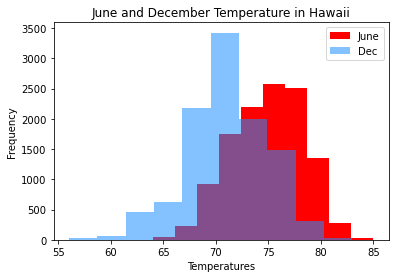

In [223]:
#testing data via histograms
june_hist = plt.hist(june_dates, alpha = 1, color = 'red', label = 'June')
dec_hist = plt.hist(dec_dates, alpha = 0.55, color = 'dodgerblue', label = 'Dec')
plt.xlabel('Temperatures')
plt.ylabel('Frequency')
plt.title('June and December Temperature in Hawaii')
plt.legend(loc ="best")

#sav png
output_data_file = '../output_data/bonus_hist.png'
plt.savefig(output_data_file)

In [233]:
print('The two groups are related to the location for which they evaluate, in this case, the temperatures in Hawaii. Therefore, we would want to use a paired t-test. However, due to the unequal length of temperature values, we cannot use a paired t-test, so an unpaired t-test must suffice.')

The two groups are related to the location for which they evaluate, in this case, the temperatures in Hawaii. Therefore, we would want to use a paired t-test. However, due to the unequal length of temperature values, we cannot use a paired t-test, so an unpaired t-test must suffice


In [238]:
stats.ttest_ind(june_dates, dec_dates)

Ttest_indResult(statistic=83.63788374807295, pvalue=0.0)

In [237]:
#lengths of both lists below:
#june: 11900
#dec: 10619
#stats.ttest_rel(june_dates, dec_dates)
print('Nevertheless, due to the size of the samples, a z-test should be used instead of a t-test.')

Nevertheless, due to the size of the samples, a z-test should be used instead of a t-test.


Ttest_indResult(statistic=83.63788374807295, pvalue=0.0)